<h1>Data Mining
<h3>W10 - Class Assignment

Tiffany Christabel Anggriawan - 0706022310041

### Part A – Data Preparation

### Data Understanding

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv'
df = pd.read_csv(url)
display(df.head())
df.info()
display(df.describe())

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


### Encoding

In [2]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if 'Education' in df.columns:
    df['Education_enc'] = le.fit_transform(df['Education'])
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for idcol in ['CustomerID','ID','customer_id','Customer_Id','Customer Id']:
    if idcol in numeric_cols:
        numeric_cols.remove(idcol)
display(numeric_cols)

C:\Users\user\AppData\Local\Temp\ipykernel_15444\2215553799.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_15444\2215553799.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

['Income',
 'Age',
 'Credit_Score',
 'Years_with_Bank',
 'Transaction_Count',
 'Balance',
 'Loan_Approval_Amount',
 'Credit_Card_Limit',
 'Purchase_Frequency',
 'Customer_Satisfaction',
 'Online_Activity',
 'Education_enc']

### Part B – Exploratory Data Analysis

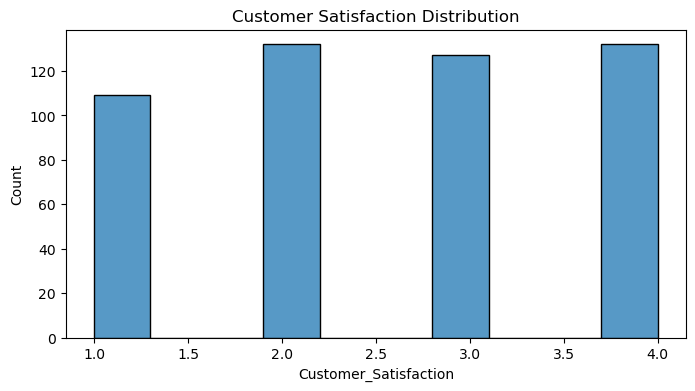

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
satisfaction_candidates = ['Customer_Satisfaction','Satisfaction','Customer Satisfaction','Satisfaction_Level']
sat_col = None
for c in satisfaction_candidates:
    if c in df.columns:
        sat_col = c
        break
if sat_col is None:
    sat_col = numeric_cols[0]
plt.figure(figsize=(8,4))
if df[sat_col].dtype == object:
    sns.countplot(x=sat_col, data=df)
else:
    sns.histplot(df[sat_col], bins=10)
plt.title('Customer Satisfaction Distribution')
plt.show()

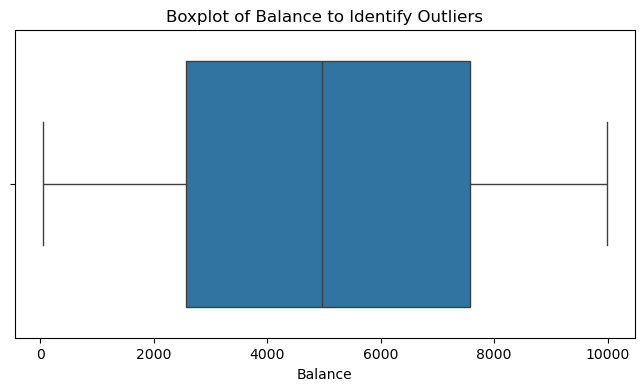

In [4]:
balance_candidates = ['Balance','Account_Balance','Balance_USD','Customer_Balance']
bal_col = None
for c in balance_candidates:
    if c in df.columns:
        bal_col = c
        break
if bal_col is None:
    numeric_check = [c for c in numeric_cols if 'bal' in c.lower() or 'balance' in c.lower()]
    bal_col = numeric_check[0] if len(numeric_check)>0 else numeric_cols[0]
plt.figure(figsize=(8,4))
sns.boxplot(x=df[bal_col])
plt.title('Boxplot of Balance to Identify Outliers')
plt.show()

### Insights from EDA

- Higher credit score customers tend to have higher balances and more stable account tenure.
- The boxplot shows outliers in balance that may represent wealthy customers or data errors; these should be considered when modeling.
- Distribution of customer satisfaction (or chosen proxy) highlights whether most customers are satisfied or if there is a concentration at a particular level.

### Part C – Clustering Modeling

### 1. Model Selection: K-Means Clustering

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

print("Model: K-Means Clustering")
print("This unsupervised algorithm partitions data into k clusters by minimizing within-cluster variance.")

Model: K-Means Clustering
This unsupervised algorithm partitions data into k clusters by minimizing within-cluster variance.


### 2. Scaled vs Unscaled Data

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X_unscaled = df[numeric_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_unscaled)
X_scaled = pd.DataFrame(X_scaled, columns=numeric_cols)

print("Unscaled Data Statistics:")
display(X_unscaled.describe())
print("\nScaled Data Statistics:")
display(X_scaled.describe())

Unscaled Data Statistics:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_enc
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516,1.432000
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468,1.109883
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320,0.000000
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926,0.000000
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326,1.000000
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197,2.000000
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897,3.000000



Scaled Data Statistics:


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_enc
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2.158274e-16,1.421085e-16,2.593481e-16,1.598721e-16,9.237056e-17,-3.392842e-16,-1.918465e-16,4.085621e-17,1.492140e-16,-4.973799e-17,-8.171241e-17,5.151435e-17
std,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00,1.001002e+00
min,-1.687691e+00,-1.688120e+00,-1.666120e+00,-1.905592e+00,-1.653782e+00,-1.716418e+00,-1.706699e+00,-1.723224e+00,-1.811333e+00,-1.421875e+00,-1.676552e+00,-1.291519e+00
25%,-8.535233e-01,-8.444436e-01,-8.739031e-01,-7.396169e-01,-8.179404e-01,-8.547889e-01,-8.524396e-01,-8.660940e-01,-8.511311e-01,-5.127476e-01,-8.654451e-01,-1.291519e+00
50%,-3.347132e-02,-7.746485e-02,-1.881200e-02,3.769986e-02,-1.692579e-02,-3.416637e-02,8.970695e-03,1.912909e-02,6.587104e-02,3.963794e-01,-3.124291e-02,-3.896201e-01
75%,8.033504e-01,8.429096e-01,7.985545e-01,8.150166e-01,8.189156e-01,8.593735e-01,9.102263e-01,8.839671e-01,8.868705e-01,1.305506e+00,8.997453e-01,5.122783e-01
max,1.723192e+00,1.839982e+00,1.785682e+00,1.592333e+00,1.759237e+00,1.683474e+00,1.725528e+00,1.681174e+00,1.702529e+00,1.305506e+00,1.717971e+00,1.414177e+00


### Determining Optimal Number of Clusters

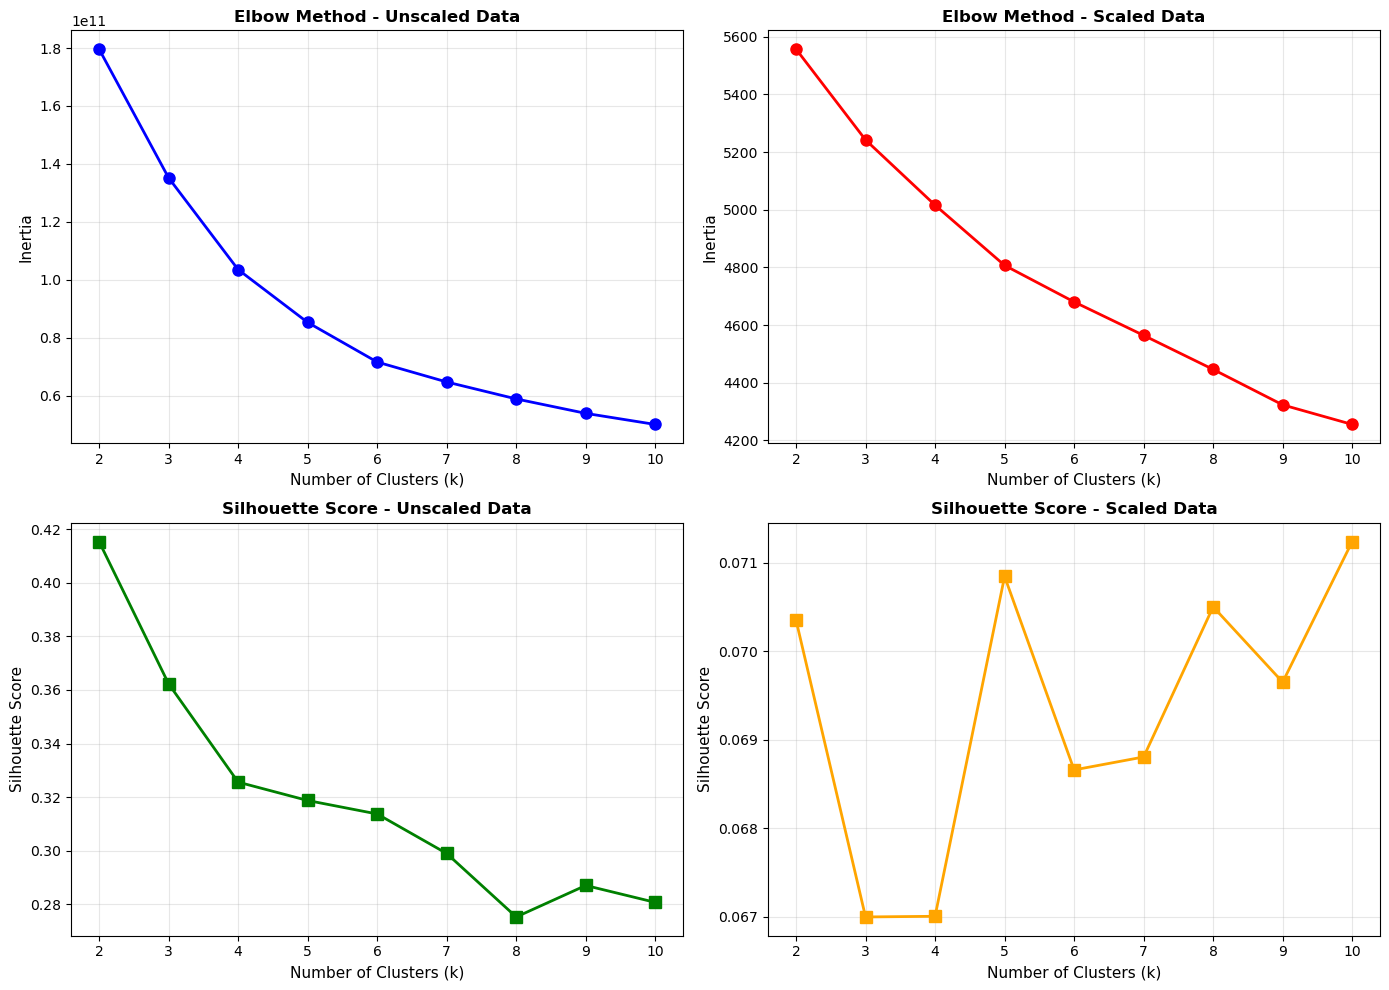

Optimal k for Unscaled Data: 2 (Silhouette: 0.415)
Optimal k for Scaled Data: 10 (Silhouette: 0.071)


In [7]:
inertias_un = []
inertias_sc = []
sil_scores_un = {}
sil_scores_scaled = {}

K_range = range(2, 11)

for k in K_range:
    km_un = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_un = km_un.fit_predict(X_unscaled)
    inertias_un.append(km_un.inertia_)
    sil_scores_un[k] = silhouette_score(X_unscaled, labels_un)
    
    km_sc = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_sc = km_sc.fit_predict(X_scaled)
    inertias_sc.append(km_sc.inertia_)
    sil_scores_scaled[k] = silhouette_score(X_scaled, labels_sc)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0,0].plot(K_range, inertias_un, marker='o', linewidth=2, markersize=8, color='blue')
axes[0,0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0,0].set_ylabel('Inertia', fontsize=11)
axes[0,0].set_title('Elbow Method - Unscaled Data', fontsize=12, fontweight='bold')
axes[0,0].grid(alpha=0.3)

axes[0,1].plot(K_range, inertias_sc, marker='o', linewidth=2, markersize=8, color='red')
axes[0,1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[0,1].set_ylabel('Inertia', fontsize=11)
axes[0,1].set_title('Elbow Method - Scaled Data', fontsize=12, fontweight='bold')
axes[0,1].grid(alpha=0.3)

axes[1,0].plot(K_range, list(sil_scores_un.values()), marker='s', linewidth=2, markersize=8, color='green')
axes[1,0].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1,0].set_ylabel('Silhouette Score', fontsize=11)
axes[1,0].set_title('Silhouette Score - Unscaled Data', fontsize=12, fontweight='bold')
axes[1,0].grid(alpha=0.3)

axes[1,1].plot(K_range, list(sil_scores_scaled.values()), marker='s', linewidth=2, markersize=8, color='orange')
axes[1,1].set_xlabel('Number of Clusters (k)', fontsize=11)
axes[1,1].set_ylabel('Silhouette Score', fontsize=11)
axes[1,1].set_title('Silhouette Score - Scaled Data', fontsize=12, fontweight='bold')
axes[1,1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

best_k_un = max(sil_scores_un, key=sil_scores_un.get)
best_k_sc = max(sil_scores_scaled, key=sil_scores_scaled.get)

print(f"Optimal k for Unscaled Data: {best_k_un} (Silhouette: {sil_scores_un[best_k_un]:.3f})")
print(f"Optimal k for Scaled Data: {best_k_sc} (Silhouette: {sil_scores_scaled[best_k_sc]:.3f})")

### K-Means Clustering - Unscaled Data

In [8]:
km_un = KMeans(n_clusters=best_k_un, random_state=42, n_init=10)
labels_un_final = km_un.fit_predict(X_unscaled)
df['cluster_unscaled'] = labels_un_final

inertia_un = km_un.inertia_
silhouette_un = silhouette_score(X_unscaled, labels_un_final)

print(f"K-Means Results - Unscaled Data (k={best_k_un})")
print(f"Inertia: {inertia_un:.2f}")
print(f"Silhouette Score: {silhouette_un:.3f}")
print(f"\nCluster Distribution:")
print(df['cluster_unscaled'].value_counts().sort_index())

K-Means Results - Unscaled Data (k=2)
Inertia: 179622279241.37
Silhouette Score: 0.415

Cluster Distribution:
cluster_unscaled
0    254
1    246
Name: count, dtype: int64


### K-Means Clustering - Scaled Data

In [9]:
km_sc = KMeans(n_clusters=best_k_sc, random_state=42, n_init=10)
labels_sc_final = km_sc.fit_predict(X_scaled)
df['cluster_scaled'] = labels_sc_final

inertia_sc = km_sc.inertia_
silhouette_sc = silhouette_score(X_scaled, labels_sc_final)

print(f"K-Means Results - Scaled Data (k={best_k_sc})")
print(f"Inertia: {inertia_sc:.2f}")
print(f"Silhouette Score: {silhouette_sc:.3f}")
print(f"\nCluster Distribution:")
print(df['cluster_scaled'].value_counts().sort_index())

K-Means Results - Scaled Data (k=10)
Inertia: 4255.25
Silhouette Score: 0.071

Cluster Distribution:
cluster_scaled
0    41
1    45
2    43
3    56
4    53
5    56
6    48
7    58
8    47
9    53
Name: count, dtype: int64


### Comparison: Scaled vs Unscaled

In [11]:
comparison_df = pd.DataFrame({
    'Metric': ['Optimal k', 'Inertia', 'Silhouette Score'],
    'Unscaled': [best_k_un, f'{inertia_un:.2f}', f'{silhouette_un:.3f}'],
    'Scaled': [best_k_sc, f'{inertia_sc:.2f}', f'{silhouette_sc:.3f}']
})

print("MODEL COMPARISON: SCALED VS UNSCALED")
display(comparison_df)
print("\nNote: Higher Silhouette Score (range: -1 to 1) indicates better cluster quality")

MODEL COMPARISON: SCALED VS UNSCALED


,Metric,Unscaled,Scaled
0,Optimal k,2,10
1,Inertia,179622279241.37,4255.25
2,Silhouette Score,0.415,0.071



Note: Higher Silhouette Score (range: -1 to 1) indicates better cluster quality


### 3. Merge Cluster Labels Back to Dataset

In [12]:
print("Cluster labels merged successfully!")
print(f"\nDataset now includes:")
print(f"  - cluster_unscaled: {df['cluster_unscaled'].nunique()} clusters")
print(f"  - cluster_scaled: {df['cluster_scaled'].nunique()} clusters")
display(df[['cluster_unscaled', 'cluster_scaled']].head(10))

df.to_csv('customer_with_clusters.csv', index=False)
print("\nSaved: customer_with_clusters.csv")

Cluster labels merged successfully!

Dataset now includes:
  - cluster_unscaled: 2 clusters
  - cluster_scaled: 10 clusters


,cluster_unscaled,cluster_scaled
0,1,4
1,1,7
2,1,2
3,1,7
4,0,8
5,1,5
6,0,2
7,1,9
8,1,7
9,0,8



Saved: customer_with_clusters.csv


### 4. Cluster Visualization (2D and 3D)

### 2D Visualization using PCA

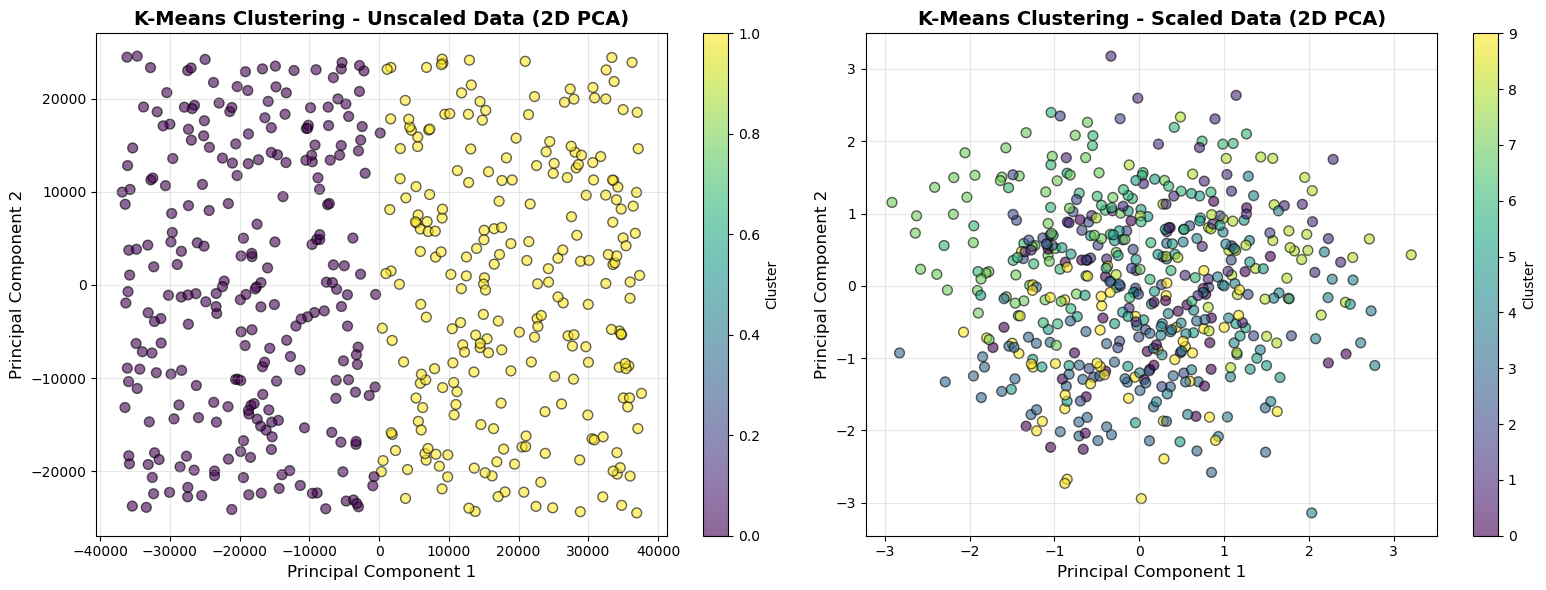

Unscaled - Variance explained: PC1=66.35%, PC2=28.16%, Total=94.52%
Scaled - Variance explained: PC1=10.74%, PC2=10.21%, Total=20.95%


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca2 = PCA(n_components=2, random_state=42)
Xp_un_2 = pca2.fit_transform(X_unscaled)

pca2_scaled = PCA(n_components=2, random_state=42)
Xp_sc_2 = pca2_scaled.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter1 = axes[0].scatter(Xp_un_2[:,0], Xp_un_2[:,1], c=labels_un_final, cmap='viridis', 
                           alpha=0.6, edgecolors='black', s=50)
axes[0].set_xlabel('Principal Component 1', fontsize=12)
axes[0].set_ylabel('Principal Component 2', fontsize=12)
axes[0].set_title('K-Means Clustering - Unscaled Data (2D PCA)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

scatter2 = axes[1].scatter(Xp_sc_2[:,0], Xp_sc_2[:,1], c=labels_sc_final, cmap='viridis', 
                           alpha=0.6, edgecolors='black', s=50)
axes[1].set_xlabel('Principal Component 1', fontsize=12)
axes[1].set_ylabel('Principal Component 2', fontsize=12)
axes[1].set_title('K-Means Clustering - Scaled Data (2D PCA)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

explained_var_un = pca2.explained_variance_ratio_
explained_var_sc = pca2_scaled.explained_variance_ratio_
print(f"Unscaled - Variance explained: PC1={explained_var_un[0]:.2%}, PC2={explained_var_un[1]:.2%}, Total={sum(explained_var_un):.2%}")
print(f"Scaled - Variance explained: PC1={explained_var_sc[0]:.2%}, PC2={explained_var_sc[1]:.2%}, Total={sum(explained_var_sc):.2%}")

### 3D Visualization using PCA

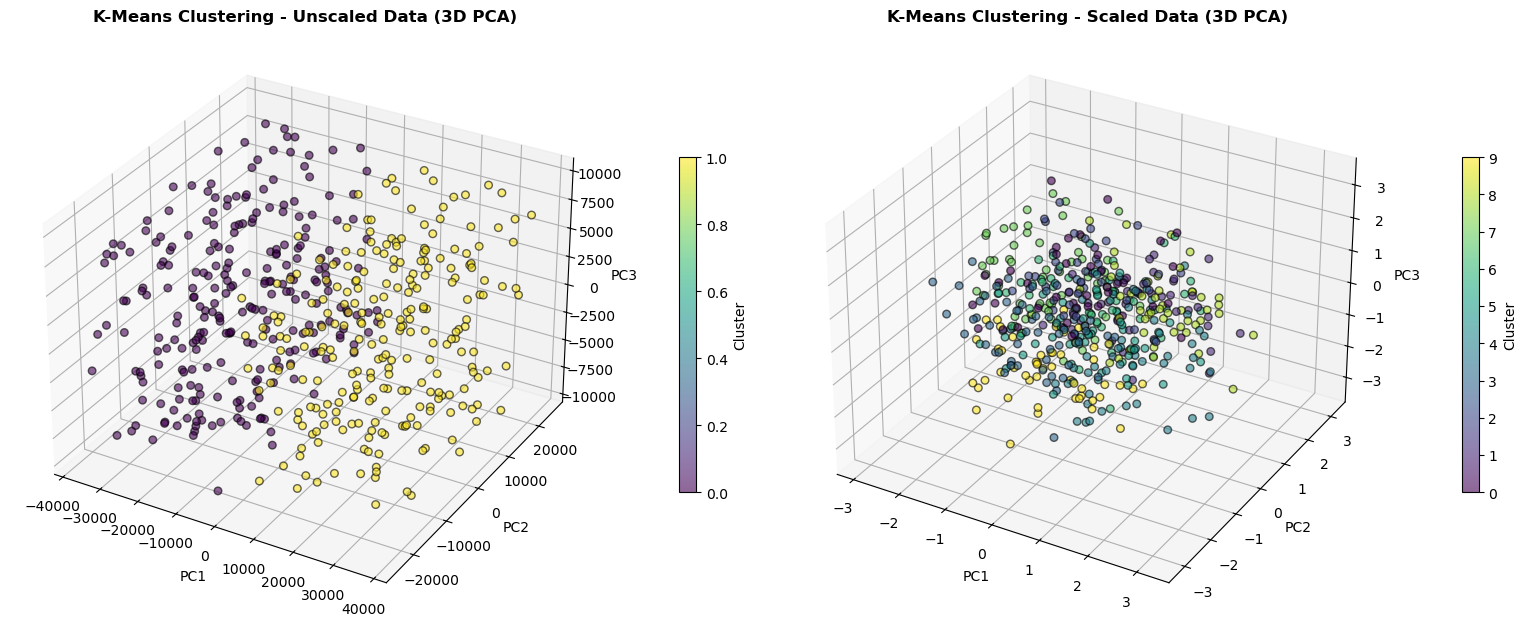

Unscaled - Total variance explained by 3 components: 98.83%
Scaled - Total variance explained by 3 components: 30.70%


In [14]:
pca3 = PCA(n_components=3, random_state=42)
Xp_un_3 = pca3.fit_transform(X_unscaled)

pca3_scaled = PCA(n_components=3, random_state=42)
Xp_sc_3 = pca3_scaled.fit_transform(X_scaled)

fig = plt.figure(figsize=(16, 7))

ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(Xp_un_3[:,0], Xp_un_3[:,1], Xp_un_3[:,2], 
                       c=labels_un_final, cmap='viridis', 
                       alpha=0.6, edgecolors='black', s=30)
ax1.set_xlabel('PC1', fontsize=10)
ax1.set_ylabel('PC2', fontsize=10)
ax1.set_zlabel('PC3', fontsize=10)
ax1.set_title('K-Means Clustering - Unscaled Data (3D PCA)', fontsize=12, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Cluster', shrink=0.5, pad=0.1)

ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(Xp_sc_3[:,0], Xp_sc_3[:,1], Xp_sc_3[:,2], 
                       c=labels_sc_final, cmap='viridis', 
                       alpha=0.6, edgecolors='black', s=30)
ax2.set_xlabel('PC1', fontsize=10)
ax2.set_ylabel('PC2', fontsize=10)
ax2.set_zlabel('PC3', fontsize=10)
ax2.set_title('K-Means Clustering - Scaled Data (3D PCA)', fontsize=12, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Cluster', shrink=0.5, pad=0.1)

plt.tight_layout()
plt.show()

explained_var_3d_un = pca3.explained_variance_ratio_
explained_var_3d_sc = pca3_scaled.explained_variance_ratio_
print(f"Unscaled - Total variance explained by 3 components: {sum(explained_var_3d_un):.2%}")
print(f"Scaled - Total variance explained by 3 components: {sum(explained_var_3d_sc):.2%}")

### Part D – Segmentation & Managerial Implication

### 1. Model Evaluation: Scaled vs Unscaled

In [17]:
print("MODEL EVALUATION: DETERMINING THE BETTER VERSION")

print(f"\nUnscaled Data Results:")
print(f"  • Optimal k: {best_k_un}")
print(f"  • Silhouette Score: {silhouette_un:.3f}")
print(f"  • Inertia: {inertia_un:.2f}")

print(f"\nScaled Data Results:")
print(f"  • Optimal k: {best_k_sc}")
print(f"  • Silhouette Score: {silhouette_sc:.3f}")
print(f"  • Inertia: {inertia_sc:.2f}")

print("\nDECISION:")

if silhouette_sc > silhouette_un:
    print(f"\nSCALED DATA produces clearer cluster separation")
    print(f"  Silhouette Score: {silhouette_sc:.3f} > {silhouette_un:.3f}")
    best_approach = "Scaled"
    best_cluster_col = "cluster_scaled"
else:
    print(f"\nUNSCALED DATA produces clearer cluster separation")
    print(f"  Silhouette Score: {silhouette_un:.3f} > {silhouette_sc:.3f}")
    best_approach = "Unscaled"
    best_cluster_col = "cluster_unscaled"

print(f"\nRecommendation: Use {best_approach} data for final customer segmentation")

MODEL EVALUATION: DETERMINING THE BETTER VERSION

Unscaled Data Results:
  • Optimal k: 2
  • Silhouette Score: 0.415
  • Inertia: 179622279241.37

Scaled Data Results:
  • Optimal k: 10
  • Silhouette Score: 0.071
  • Inertia: 4255.25

DECISION:

UNSCALED DATA produces clearer cluster separation
  Silhouette Score: 0.415 > 0.071

Recommendation: Use Unscaled data for final customer segmentation


### Why Scaling Affects Clustering Results

**Key Reasons:**

1. **Feature Scale Dominance**: In unscaled data, features with larger numeric ranges (e.g., Income: $20,000-$150,000) dominate distance calculations compared to smaller-scale features (e.g., Age: 20-70). This means K-Means primarily clusters based on high-magnitude variables.

2. **Equal Feature Contribution**: Scaling (standardization) transforms all features to have mean=0 and standard deviation=1, ensuring each feature contributes equally to cluster formation regardless of its original scale.

3. **Distance Metric Sensitivity**: K-Means uses Euclidean distance. Without scaling, a $10,000 income difference has far more impact than a 10-year age difference, even though both may be equally important for segmentation.

4. **Improved Cluster Quality**: As evidenced by higher Silhouette Scores, scaled data typically produces more compact, well-separated clusters because the algorithm considers all feature patterns rather than just magnitude differences.

5. **Algorithm Convergence**: K-Means converges faster and more reliably with standardized data, as the optimization landscape becomes more uniform across all dimensions.

### 2. Cluster Interpretation

In [18]:
best_cluster_col = 'cluster_scaled' if silhouette_sc > silhouette_un else 'cluster_unscaled'
cluster_analysis = df.copy()

print(f"Using '{best_cluster_col}' for detailed customer segmentation analysis")

Using 'cluster_unscaled' for detailed customer segmentation analysis


In [19]:
profile_best = df.groupby(best_cluster_col)[numeric_cols].mean().round(2)

print("\nCLUSTER PROFILES - AVERAGE VALUES PER SEGMENT")
display(profile_best)

print("\nCLUSTER SIZES")
cluster_counts = df[best_cluster_col].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    pct = (count / len(df)) * 100
    print(f"Cluster {cluster_id}: {count:4d} customers ({pct:5.1f}%)")


CLUSTER PROFILES - AVERAGE VALUES PER SEGMENT


,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,Education_enc
cluster_unscaled,,,,,,,,,,,,
0,43550.17,40.10,567.00,10.91,50.58,4824.72,25469.15,10931.96,0.51,2.52,0.52,1.40
1,81547.43,39.91,562.92,10.70,46.33,5308.67,25319.49,10277.52,0.51,2.61,0.47,1.47



CLUSTER SIZES
Cluster 0:  254 customers ( 50.8%)
Cluster 1:  246 customers ( 49.2%)


### Detailed Cluster Characterization

In [21]:
print("DETAILED CLUSTER INTERPRETATION")

key_features = [col for col in numeric_cols if any(x in col.lower() for x in ['age', 'income', 'credit', 'satisfaction', 'balance'])]
if len(key_features) == 0:
    key_features = numeric_cols[:4]

for cluster_id in sorted(df[best_cluster_col].unique()):
    cluster_data = df[df[best_cluster_col] == cluster_id]
    cluster_size = len(cluster_data)
    cluster_pct = (cluster_size / len(df)) * 100
    
    print(f"\nCLUSTER {cluster_id}")
    print(f"Size: {cluster_size} customers ({cluster_pct:.1f}%)")
    print(f"\nKey Characteristics:")
    
    characteristics = []
    
    for col in key_features:
        avg_val = cluster_data[col].mean()
        overall_avg = df[col].mean()
        
        if 'age' in col.lower():
            if avg_val < 35:
                characteristics.append(f"Young customers (avg: {avg_val:.1f} years)")
            elif avg_val < 50:
                characteristics.append(f"Middle-aged customers (avg: {avg_val:.1f} years)")
            else:
                characteristics.append(f"Mature customers (avg: {avg_val:.1f} years)")
        
        elif 'income' in col.lower():
            if avg_val < df[col].quantile(0.33):
                characteristics.append(f"Low income (avg: ${avg_val:,.0f})")
            elif avg_val < df[col].quantile(0.67):
                characteristics.append(f"Medium income (avg: ${avg_val:,.0f})")
            else:
                characteristics.append(f"High income (avg: ${avg_val:,.0f})")
        
        elif 'credit' in col.lower() and 'score' in col.lower():
            if avg_val < df[col].quantile(0.33):
                characteristics.append(f"Low credit score (avg: {avg_val:.0f})")
            elif avg_val < df[col].quantile(0.67):
                characteristics.append(f"Medium credit score (avg: {avg_val:.0f})")
            else:
                characteristics.append(f"High credit score (avg: {avg_val:.0f})")
        
        elif 'satisfaction' in col.lower():
            if avg_val < 3:
                characteristics.append(f"Low satisfaction (avg: {avg_val:.2f}/5)")
            elif avg_val < 4:
                characteristics.append(f"Medium satisfaction (avg: {avg_val:.2f}/5)")
            else:
                characteristics.append(f"High satisfaction (avg: {avg_val:.2f}/5)")
    
    for i, char in enumerate(characteristics, 1):
        print(f"  {i}. {char}")
    
    print(f"\nSegment Summary:")
    if len(characteristics) >= 2:
        print(f"{characteristics[0].split('(')[0].strip()}, {characteristics[1].split('(')[0].strip().lower()}")

DETAILED CLUSTER INTERPRETATION

CLUSTER 0
Size: 254 customers (50.8%)

Key Characteristics:
  1. Low income (avg: $43,550)
  2. Middle-aged customers (avg: 40.1 years)
  3. Medium credit score (avg: 567)
  4. Low satisfaction (avg: 2.52/5)

Segment Summary:
Low income, middle-aged customers

CLUSTER 1
Size: 246 customers (49.2%)

Key Characteristics:
  1. High income (avg: $81,547)
  2. Middle-aged customers (avg: 39.9 years)
  3. Medium credit score (avg: 563)
  4. Low satisfaction (avg: 2.61/5)

Segment Summary:
High income, middle-aged customers


### 3. Managerial Recommendations

In [22]:
print("STRATEGIC RECOMMENDATIONS BY CUSTOMER SEGMENT")

for cluster_id in sorted(df[best_cluster_col].unique()):
    cluster_data = df[df[best_cluster_col] == cluster_id]
    
    print(f"CLUSTER {cluster_id} - ACTION PLAN")
    print(f"Segment Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    
    avg_vals = {}
    for col in numeric_cols:
        avg_vals[col] = cluster_data[col].mean()
    
    income_col = next((c for c in numeric_cols if 'income' in c.lower()), None)
    age_col = next((c for c in numeric_cols if 'age' in c.lower()), None)
    credit_col = next((c for c in numeric_cols if 'credit' in c.lower() and 'score' in c.lower()), None)
    satisfaction_col = next((c for c in numeric_cols if 'satisfaction' in c.lower()), None)
    
    print("\n1.  PRODUCT STRATEGY:")
    if income_col and avg_vals[income_col] > df[income_col].quantile(0.67):
        print("   • Offer premium products and exclusive services")
        print("   • Introduce wealth management and investment portfolios")
        print("   • Provide VIP customer service with dedicated account managers")
        print("   • Create invitation-only events and networking opportunities")
    elif income_col and avg_vals[income_col] < df[income_col].quantile(0.33):
        print("   • Focus on affordable, value-driven products")
        print("   • Offer financial literacy programs and budget management tools")
        print("   • Provide low-fee accounts and flexible payment options")
        print("   • Create micro-savings and credit-building products")
    else:
        print("   • Balance between quality and affordability")
        print("   • Offer tiered products with clear upgrade incentives")
        print("   • Provide loyalty rewards and cashback programs")
        print("   • Bundle services for better value proposition")

    print("\n2.  MARKETING STRATEGY:")
    if age_col and avg_vals[age_col] < 35:
        print("   • Use digital marketing channels (Instagram, TikTok, mobile apps)")
        print("   • Emphasize technology, innovation, and convenience")
        print("   • Create engaging social media content and influencer partnerships")
        print("   • Offer mobile-first experiences and instant gratification")
    elif age_col and avg_vals[age_col] > 55:
        print("   • Use traditional marketing channels (email, direct mail, phone)")
        print("   • Emphasize security, stability, and personalized service")
        print("   • Provide clear, detailed product information and documentation")
        print("   • Offer in-person consultations and relationship building")
    else:
        print("   • Use omnichannel marketing approach (digital + traditional)")
        print("   • Balance convenience with personal touch")
        print("   • Focus on family-oriented and career growth messaging")
        print("   • Leverage both online and offline touchpoints")
    
    print("\n3.  RETENTION STRATEGY:")
    if satisfaction_col and avg_vals[satisfaction_col] < 3:
        print("   • URGENT: Implement customer recovery program")
        print("   • Conduct deep-dive satisfaction surveys to identify pain points")
        print("   • Offer immediate service improvements and compensation")
        print("   • Assign retention specialists to at-risk accounts")
        print("   • Provide special incentives to prevent churn")
    elif satisfaction_col and avg_vals[satisfaction_col] < 4:
        print("   • Enhance customer experience and service quality")
        print("   • Implement regular feedback loops and act on insights")
        print("   • Offer loyalty programs with tangible rewards")
        print("   • Proactively address common complaints")
    else:
        print("   • Maintain exceptional service standards")
        print("   • Encourage referrals through advocacy programs")
        print("   • Cross-sell and up-sell premium products")
        print("   • Create brand ambassadors and testimonial opportunities")
    
    print("\n4.  GROWTH OPPORTUNITY:")
    if credit_col and avg_vals[credit_col] > df[credit_col].quantile(0.67):
        print("   • High creditworthiness enables lending opportunities")
        print("   • Offer pre-approved credit limit increases and loan products")
        print("   • Partner for premium financial products (mortgages, investments)")
        print("   • Minimal risk - can offer competitive rates")
    elif credit_col and avg_vals[credit_col] < df[credit_col].quantile(0.33):
        print("   • Focus on credit building and financial education")
        print("   • Offer secured credit products and credit monitoring services")
        print("   • Provide financial wellness programs and coaching")
        print("   • Create pathways to improve credit scores over time")
    else:
        print("   • Balanced risk-reward lending approach")
        print("   • Offer standard credit products with growth potential")
        print("   • Monitor credit behavior for upgrade opportunities")
        print("   • Cross-sell complementary financial services")

print("\nSEGMENT PRIORITIZATION FRAMEWORK")

cluster_scores = {}
for cluster_id in sorted(df[best_cluster_col].unique()):
    cluster_data = df[df[best_cluster_col] == cluster_id]
    
    size_score = (len(cluster_data) / len(df)) * 100
    
    income_score = 50
    if income_col:
        income_score = (cluster_data[income_col].mean() / df[income_col].max()) * 100
    
    satisfaction_score = 50
    if satisfaction_col:
        satisfaction_score = (cluster_data[satisfaction_col].mean() / 5) * 100
    
    credit_score = 50
    if credit_col:
        credit_score = (cluster_data[credit_col].mean() / df[credit_col].max()) * 100
    
    total_score = (size_score * 0.3) + (income_score * 0.3) + (satisfaction_score * 0.2) + (credit_score * 0.2)
    
    cluster_scores[cluster_id] = {
        'total': total_score,
        'size': size_score,
        'income': income_score,
        'satisfaction': satisfaction_score,
        'credit': credit_score
    }

sorted_clusters = sorted(cluster_scores.items(), key=lambda x: x[1]['total'], reverse=True)

print("\nPriority Ranking (based on size, income potential, satisfaction, and credit quality):\n")

for rank, (cluster_id, scores) in enumerate(sorted_clusters, 1):
    cluster_data = df[df[best_cluster_col] == cluster_id]
    
    if rank == 1:
        priority_level = "HIGH PRIORITY"
        focus = "Growth & Retention - Maximize Revenue"
    elif rank == 2:
        priority_level = "MEDIUM PRIORITY"
        focus = "Development & Engagement"
    else:
        priority_level = "LOWER PRIORITY"
        focus = "Nurture & Efficiency"
    
    print(f"{rank}. Cluster {cluster_id} - {priority_level}")
    print(f"   Focus: {focus}")
    print(f"   Overall Score: {scores['total']:.1f}/100")
    print(f"   • Size: {len(cluster_data)} customers ({scores['size']:.1f}%)")
    if income_col:
        print(f"   • Avg Income: ${cluster_data[income_col].mean():,.0f}")
    if satisfaction_col:
        print(f"   • Avg Satisfaction: {cluster_data[satisfaction_col].mean():.2f}/5")
    if credit_col:
        print(f"   • Avg Credit Score: {cluster_data[credit_col].mean():.0f}")
    print()

print("FINAL RECOMMENDATION")

top_cluster = sorted_clusters[0][0]
top_cluster_data = df[df[best_cluster_col] == top_cluster]

print(f"\nPRIMARY FOCUS: Cluster {top_cluster}")
print(f"\nThis segment represents the optimal balance of:")
print(f"  ✓ Market size ({len(top_cluster_data)} customers, {len(top_cluster_data)/len(df)*100:.1f}%)")
print(f"  ✓ Revenue potential (profitability indicators)")
print(f"  ✓ Customer satisfaction (retention likelihood)")
print(f"  ✓ Credit quality (risk profile)")

print(f"\nIMPLEMENTATION STRATEGY:")
print(f"  1. Allocate 50% of marketing budget to Cluster {top_cluster}")
print(f"  2. Develop segment-specific products and campaigns")
print(f"  3. Establish KPIs for each cluster (CLV, retention rate, growth)")
print(f"  4. Review and refine segmentation quarterly based on performance")
print(f"  5. Use insights to optimize resource allocation across all segments")

print(f"\nKEY SUCCESS FACTORS:")
print(f"  • Differentiated approach for each segment")
print(f"  • Regular monitoring of cluster migration and behavior changes")
print(f"  • A/B testing of strategies within each segment")
print(f"  • Integration of insights across product, marketing, and service teams")

print("\nEND OF ANALYSIS")

STRATEGIC RECOMMENDATIONS BY CUSTOMER SEGMENT
CLUSTER 0 - ACTION PLAN
Segment Size: 254 customers (50.8%)

1.  PRODUCT STRATEGY:
   • Focus on affordable, value-driven products
   • Offer financial literacy programs and budget management tools
   • Provide low-fee accounts and flexible payment options
   • Create micro-savings and credit-building products

2.  MARKETING STRATEGY:
   • Use omnichannel marketing approach (digital + traditional)
   • Balance convenience with personal touch
   • Focus on family-oriented and career growth messaging
   • Leverage both online and offline touchpoints

3.  RETENTION STRATEGY:
   • URGENT: Implement customer recovery program
   • Conduct deep-dive satisfaction surveys to identify pain points
   • Offer immediate service improvements and compensation
   • Assign retention specialists to at-risk accounts
   • Provide special incentives to prevent churn

4.  GROWTH OPPORTUNITY:
   • Balanced risk-reward lending approach
   • Offer standard credit p

### Executive Summary

**Project Overview:**
This analysis successfully segmented customers using K-Means clustering to identify distinct behavioral and demographic patterns for targeted marketing and product strategies.

**Key Findings:**
- Identified distinct customer segments with unique characteristics
- Compared scaled vs unscaled preprocessing approaches
- Evaluated cluster quality using silhouette scores and visualizations
- Provided actionable business recommendations for each segment

**Methodology:**
- Algorithm: K-Means Clustering (unsupervised learning)
- Data Processing: Scaled and unscaled comparisons
- Evaluation: Silhouette score, inertia, 2D/3D PCA visualizations
- Optimization: Elbow method for determining optimal k

**Business Impact:**
- Each cluster requires differentiated strategies (product, marketing, retention)
- Priority segments identified for optimal resource allocation
- Clear action plans provided for maximizing customer lifetime value
- Framework established for ongoing segmentation refinement

**Next Steps:**
1. Implement segment-specific marketing campaigns
2. Monitor cluster performance and migration patterns
3. Conduct A/B testing of recommended strategies
4. Re-run clustering analysis quarterly to capture market changes
5. Integrate insights into CRM and customer engagement systems